mall custemer segmentation using k means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('E:\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (IN INR),Spending Score (1-100)
0,1,Male,19,1241,39
1,2,Male,21,2201,81
2,3,Female,20,620,6
3,4,Female,23,2271,77
4,5,Female,31,1740,40


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (IN INR)  200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (IN INR),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,2332.820000,50.200000
std,57.879185,13.969007,977.739495,25.823522
min,1.000000,18.000000,534.000000,1.000000
25%,50.750000,28.750000,1514.500000,34.750000
50%,100.500000,36.000000,2355.500000,50.000000
75%,150.250000,49.000000,3050.500000,73.000000
max,200.000000,70.000000,4453.000000,99.000000


<Axes: xlabel='Gender', ylabel='count'>

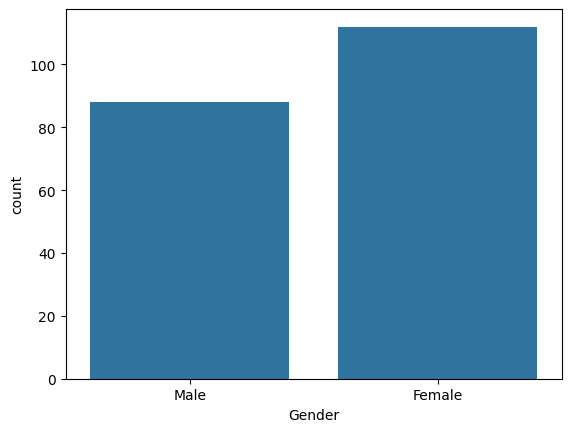

In [4]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Age', ylabel='Count'>

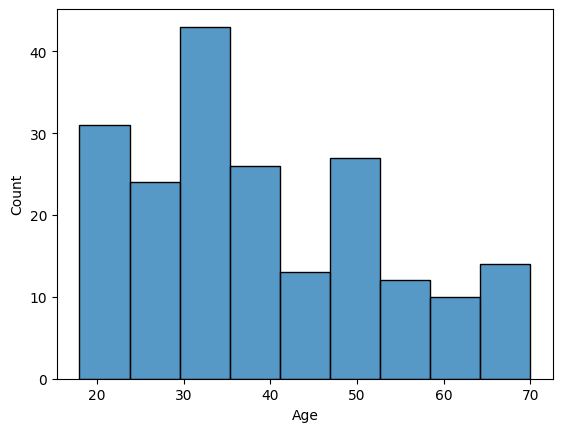

In [5]:
sns.histplot(df['Age'])

<Axes: xlabel='Annual Income (IN INR)', ylabel='Count'>

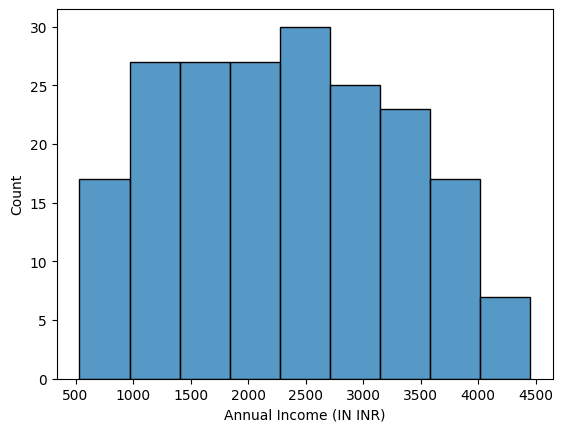

In [6]:
sns.histplot(df['Annual Income (IN INR)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

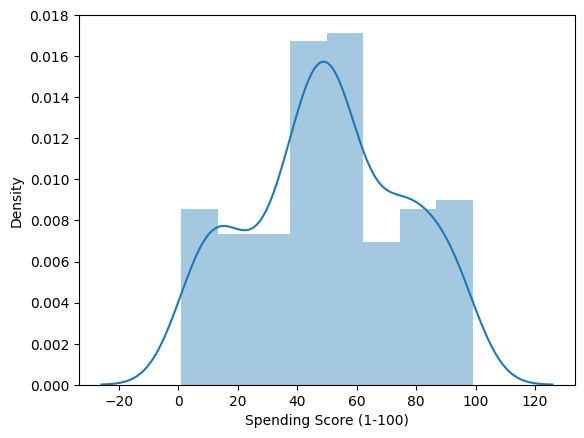

In [7]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

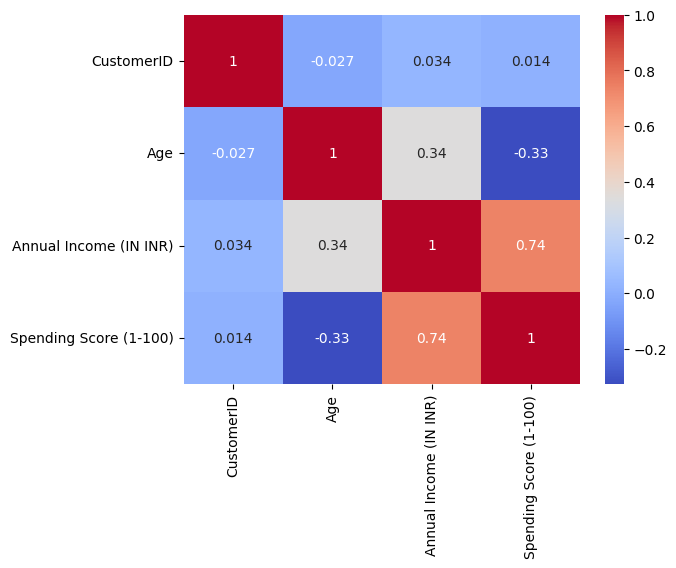

In [8]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
df1 = df[['Annual Income (IN INR)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (IN INR),Spending Score (1-100)
0,1241,39
1,2201,81
2,620,6
3,2271,77
4,1740,40


<Axes: xlabel='Annual Income (IN INR)', ylabel='Spending Score (1-100)'>

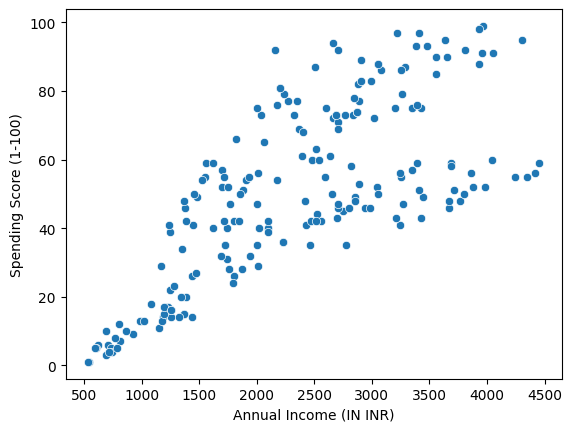

In [10]:
sns.scatterplot(
    x=df1['Annual Income (IN INR)'],
    y=df1['Spending Score (1-100)'])

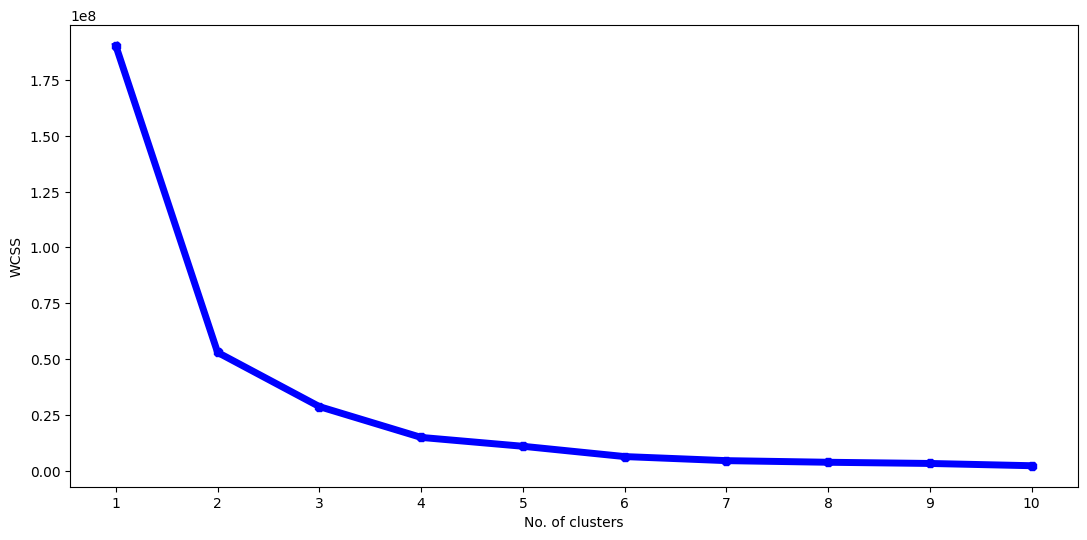

In [13]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=5, color='blue', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [14]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['clustering'] = y
df1.head()
df2 = df[['Annual Income (IN INR)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (IN INR),Spending Score (1-100),Age
0,1241,39,19
1,2201,81,21
2,620,6,20
3,2271,77,23
4,1740,40,31


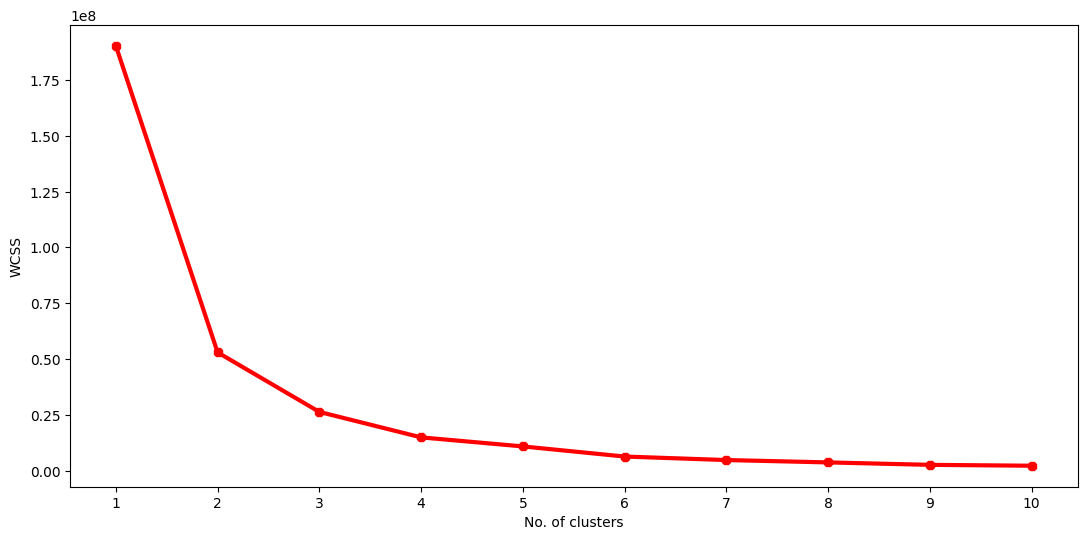

In [15]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()


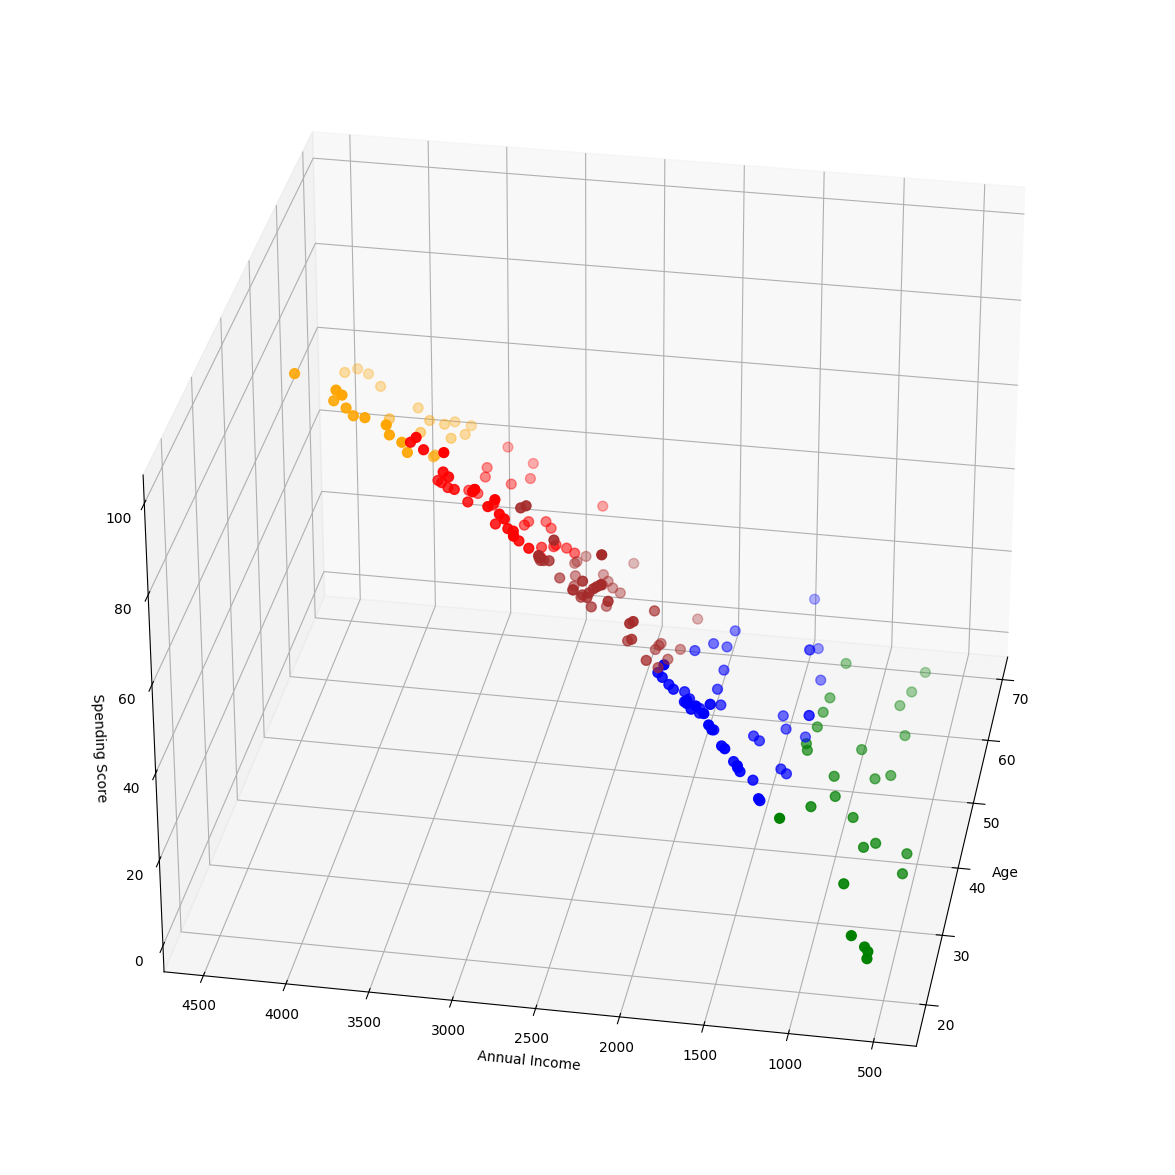

In [16]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (IN INR)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (IN INR)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (IN INR)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (IN INR)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (IN INR)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [17]:
df1 = df[['CustomerID', 'Annual Income (IN INR)', 'Spending Score (1-100)']]

In [18]:
df1 = df[['CustomerID', 'Annual Income (IN INR)', 'Spending Score (1-100)']]

# Apply KMeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=0)
X = df1[['Annual Income (IN INR)', 'Spending Score (1-100)']]
y = km.fit_predict(X)

# Store cluster labels
df1['clustering'] = y

# Display group-wise customer IDs
for i in range(5):  # For clusters 0 to 4
    cluster = df1[df1['clustering'] == i]
    print(f'Number of customers in Group {i+1} =', len(cluster))
    print('They are -', cluster["CustomerID"].values)
    print("--------------------------------------------")


Number of customers in Group 1 = 47
They are - [ 12  20  47  54  58  61  63  64  65  68  71  73  74  75  81  83  87  91
 103 105 107 109 110 111 117 118 120 124 128 130 132 142 144 146 150 152
 154 164 166 168 174 180 182 186 190 194 196]
--------------------------------------------
Number of customers in Group 2 = 36
They are - [  1  11  13  25  35  37  39  62  66  69  92 100 101 106 112 114 115 116
 125 129 133 143 149 151 153 155 167 169 175 177 179 183 189 191 195 199]
--------------------------------------------
Number of customers in Group 3 = 54
They are - [  8  10  14  24  26  28  30  38  41  42  44  51  52  55  56  57  60  67
  72  77  78  80  82  84  86  89  90  93  97  99 102 108 119 123 126 134
 136 138 140 148 156 158 160 161 162 170 172 176 178 184 188 192 198 200]
--------------------------------------------
Number of customers in Group 4 = 19
They are - [  3   7   9  15  23  31  33 131 135 137 139 141 145 157 159 163 171 173
 193]
---------------------------------------

In [19]:
def main_project():
    print("Main project is running...")

In [20]:
users = {'meghraj': 'upadhya456', 'admin': 'admin123'}
username = input("Enter username: ")
password = input("Enter password: ")

if username in users and users[username] == password:
    print(f"✅ Login successful! Welcome, {username}.")
    main_project()
else:
    print("❌ Login failed! Access denied.")
    exit()

✅ Login successful! Welcome, meghraj.
Main project is running...
